# Analysis of Concatenation

Previous studies has shown that the reconstruction is highly sensitive to the sampling capability, and it is not economical to apply high sampling frequency for reconstruction. Hence, based on practical purpose, we suppose that we can generate a modulated signal in a short period (determined by lab purpose) good enough for application.

Previous study gives a fairly good reconstruction for a duration of 250 ns and sampling 10000 times.

### Previous Results

In [99]:
import numpy as np
import matplotlib.pyplot as plt

from CGH_by_GSA import calculate_mse, plot_frequency_domain, Gaussian_Light, main, signal,fourier_transformt,fourier_transform



def spectrum_generation(freqs):
    '''
    Input:
        freqs: ndarray, frequency range for spectrum generation
        
    Output:
        Amplitude: ndarray, Generated Amplitude Spectrum
        Phase: ndarray, Generated Phase Spectrum
    '''
    # Initialization to zeros
    Phase = np.zeros(len(freqs))
    Amplitude = np.zeros(len(freqs))
    Signal_w = [Amplitude[i] * np.exp(1j * Phase[i]) for i in range(len(freqs))]
    
    # Default: Supperposition of Four Gaussian Lights 
    Amplitude = 0.4 * Gaussian_Light(0, 30, freqs)
    c = [Amplitude[i] * np.exp(1j * Phase[i]) for i in range(len(freqs))]
    Signal_w = [Signal_w[i] + c[i] for i in range(len(freqs))]
    
    Amplitude = Gaussian_Light(600, 30, freqs)
    c = [Amplitude[i] * np.exp(1j * Phase[i]) for i in range(len(freqs))]
    Signal_w = [Signal_w[i] + c[i] for i in range(len(freqs))]
    
    Amplitude = Gaussian_Light(-600, 30, freqs)
    c = [Amplitude[i] * np.exp(1j * Phase[i]) for i in range(len(freqs))]
    Signal_w = [Signal_w[i] + c[i] for i in range(len(freqs))]
    
    Amplitude = 0.6 * Gaussian_Light(-400, 30, freqs)
    c = [Amplitude[i] * np.exp(1j * Phase[i]) for i in range(len(freqs))]
    Signal_w = [Signal_w[i] + c[i] for i in range(len(freqs))]
    
    Amplitude = np.abs(Signal_w)
    Phase = np.angle(Signal_w)
    return Amplitude, Phase

In [100]:
### Regenerate Previous Results

T0 = 1 # Time range
N0 = 2500 # Sampling Frequency 2.5 MHz
  # Number of Sampling points
t0 = np.linspace(0, T0, N0)

num_iterations0 = 200

# Generate frequency range
w0 = np.fft.fftfreq(N0, t0[1]-t0[0])

# Define signal in time Domain
signal_out0,_ = signal(T0, N0)

# Define Target Spectrum
amplitude_spectrum_1, phase_spectrum_1 = spectrum_generation(w0)

In [101]:
t0, amplitude_spectrum0, phase_spectrum0, A_t0, phi_t0, errors0 = main(T0, N0, num_iterations0, amplitude_spectrum_1, phase_spectrum_1, signal_out0)

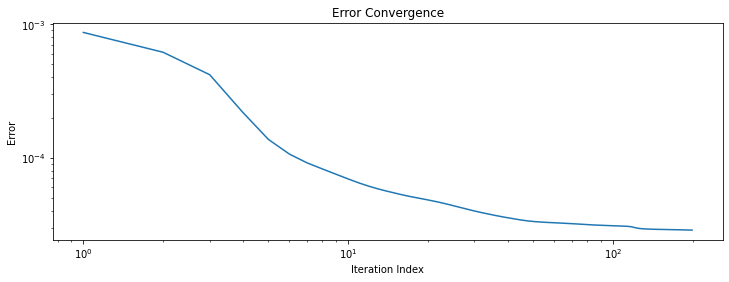

dada


In [102]:
plt.figure(figsize=(12, 4))
plt.loglog(list(range(num_iterations0))[1:], errors0[1:])
#plt.yscale("log",basey=10)
plt.xlabel('Iteration Index')
plt.ylabel('Error')
plt.title('Error Convergence')
plt.show()
print('dada')

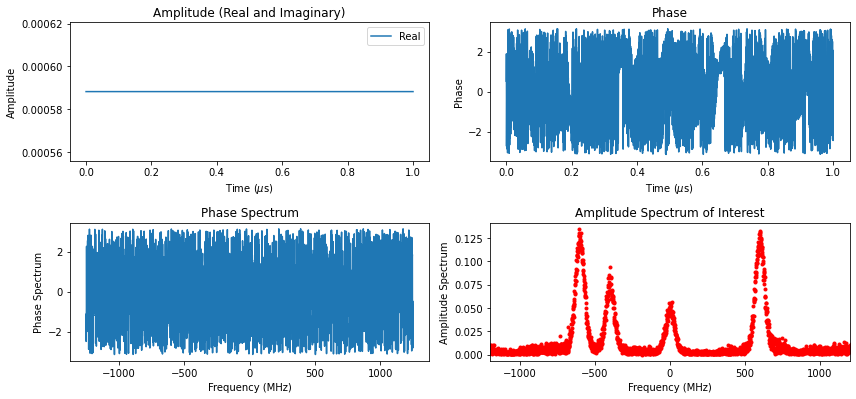

In [103]:
plot_frequency_domain(w0, t0, A_t0, phi_t0, amplitude_spectrum0, phase_spectrum0)

In [104]:
target, _ = spectrum_generation(w0)
calculate_mse(target, amplitude_spectrum0)

2.867287067470072e-05

再尝试生成一个头尾相接的大函数，切片分析

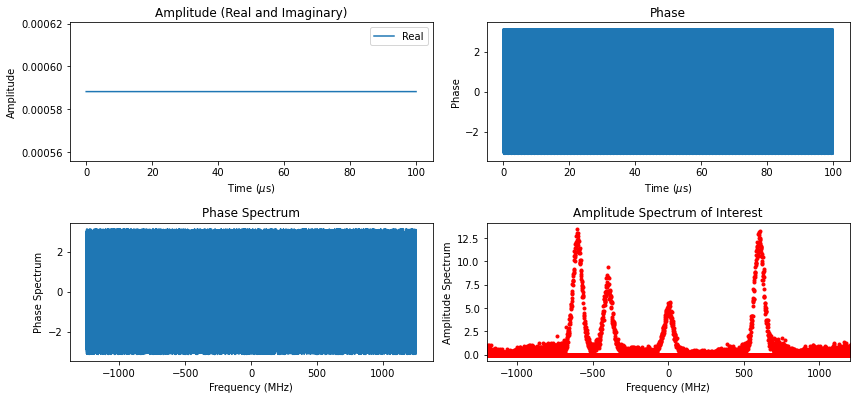

In [105]:
k = 100  # Number of Concatenation

phi_tn = np.tile(phi_t0, k)  # 将数组复制 n 次
#phi_tn = np.concatenate([phi_tn])  # 首尾相连
t = np.linspace(0, T0*k, N0*k)

#interest_begin=0
#interest_end=99900*2
#N=int((interest_end-interest_begin))
N = N0 * k

w = np.fft.fftfreq(N, t[1]-t[0])
A_tn = np.tile(A_t0, k)  # 将数组复制 n 次
#A_tn = np.concatenate([A_tn])  # 首尾相连

amplitude_spectrumn,phase_spectrumn=fourier_transformt(A_tn, phi_tn)
plot_frequency_domain(w, t, A_tn, phi_tn, amplitude_spectrumn, phase_spectrumn)


consideration:slided spectrum
now we have t, amplitude_spectrum, phase_spectrum, A_t, phi_t,我们希望对A_T和phit进行切片操作来分析频谱（主要是phit）。

In [106]:
'''
interest_begin=0
interest_end=1000
n=int((interest_end-interest_begin) + 1)

w = np.fft.fftfreq(n, t0[1]-t0[0])
phi_t_interest=phi_t0[interest_begin:interest_end + 1]
A_t_interest=A_t0[interest_begin:interest_end + 1]
amplitude_spectrum_interest,phase_spectrum_interest=fourier_transformt(A_t_interest, phi_t_interest)
plot_frequency_domain(w, t0[interest_begin:interest_end + 1], A_t_interest, phi_t_interest, amplitude_spectrum_interest, phase_spectrum_interest)
'''

'\ninterest_begin=0\ninterest_end=1000\nn=int((interest_end-interest_begin) + 1)\n\nw = np.fft.fftfreq(n, t0[1]-t0[0])\nphi_t_interest=phi_t0[interest_begin:interest_end + 1]\nA_t_interest=A_t0[interest_begin:interest_end + 1]\namplitude_spectrum_interest,phase_spectrum_interest=fourier_transformt(A_t_interest, phi_t_interest)\nplot_frequency_domain(w, t0[interest_begin:interest_end + 1], A_t_interest, phi_t_interest, amplitude_spectrum_interest, phase_spectrum_interest)\n'

In [107]:
target, _= spectrum_generation(w)

In [108]:
calculate_mse(target, amplitude_spectrumn)

0.08566431707919092

In [109]:
amplitude_spectrumn0 = np.array([amp / k for amp in amplitude_spectrumn])
phase_spectrumn0 = np.array([phi / k for phi in phase_spectrumn])

In [110]:
error1 = calculate_mse(target, amplitude_spectrumn0)
print(error1)

0.0008846821070977393


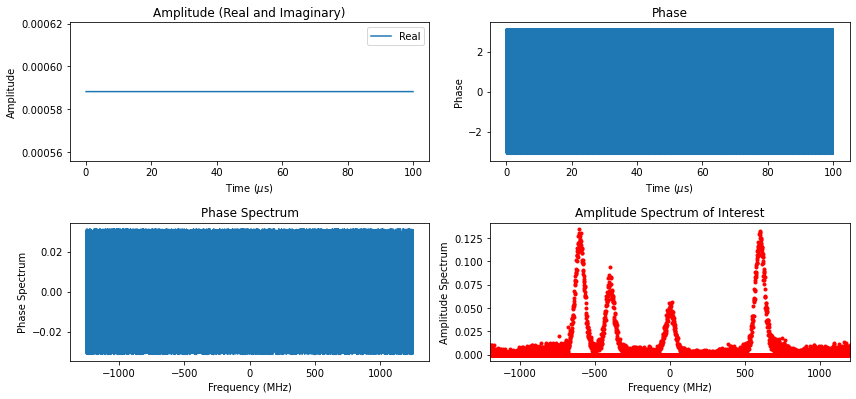

In [88]:
plot_frequency_domain(w, t, A_tn, phi_tn, amplitude_spectrumn0, phase_spectrumn0)

Hence, the scaling of overall spectrum also affect the resulting spectrum.

## Concatenate Head-by-Head and Tail-by-Tail (Not Working)

Now try to concatenate head-by-head and tail-by-tail, this shall not affect the target spectrum but enhance smoothness.

In [89]:
# k, t0, N0 does not change
# Obtain modified Concatenation of Phase
phi_tn_prime = phi_t0
phi_rev = phi_t0[::-1]

for i in range(k - 1):
    if i % 2 == 0:
        phi_tn_prime = np.concatenate([phi_tn_prime, phi_rev])
    else:
        phi_tn_prime = np.concatenate([phi_tn_prime, phi_t0])

In [90]:
# k, t0, N0 does not change
# Obtain modified Concatenation of Amplitude

A_tn_prime = A_t0
A_rev = A_t0[::-1]

for i in range(k - 1):
    if i % 2 == 0:
        A_tn_prime = np.concatenate([A_tn_prime, A_rev])
    else:
        A_tn_prime = np.concatenate([A_tn_prime, A_t0])

In [91]:
amplitude_spectrum,phase_spectrum=fourier_transformt(A_tn_prime, phi_tn_prime)

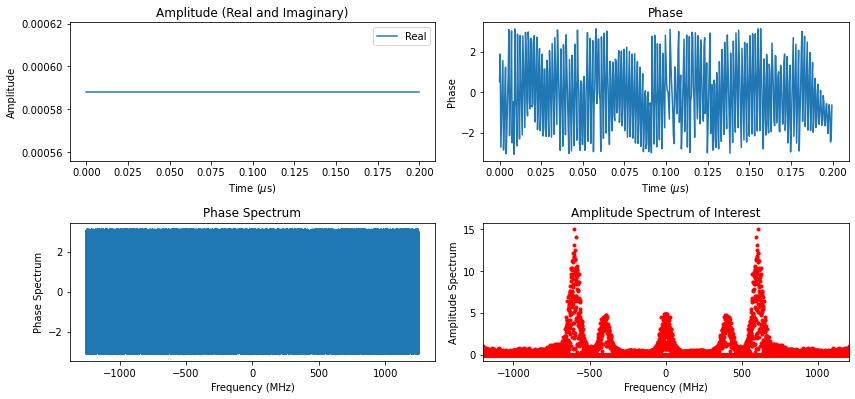

In [92]:
plot_frequency_domain(w, t[:500], A_tn_prime[:500], phi_tn_prime[:500], amplitude_spectrum, phase_spectrum)

In [93]:
#calculate_mse(target, amplitude_spectrum)
w = np.fft.fftfreq(len(amplitude_spectrum), t[1]-t[0])
target, _= spectrum_generation(w)

In [94]:
amplitude_spectrum = [amp / k for amp in amplitude_spectrum]

In [95]:
error2 = calculate_mse(target, amplitude_spectrum)

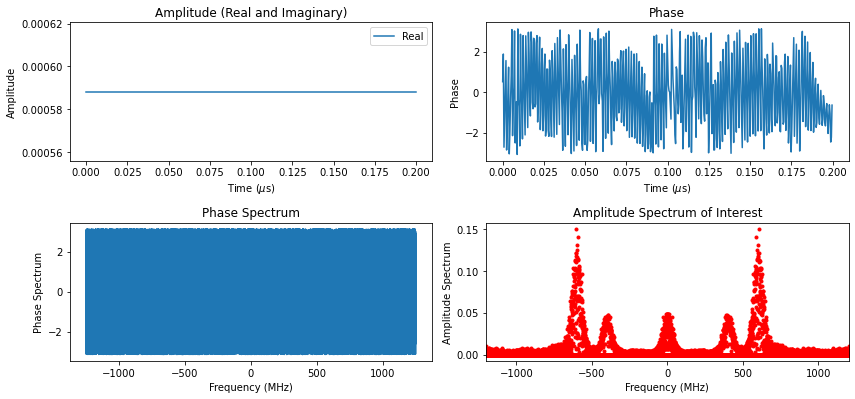

In [96]:
plot_frequency_domain(w, t[:500], A_tn_prime[:500], phi_tn_prime[:500], amplitude_spectrum, phase_spectrum)

Switching the order of the sequence would not reconstruct the desired spectrum. Based on previous analysis, slicing the reconstructed phase and take the average of superposition of different slices would not obtain expected spectrum. Does it show the uniqueness of the reconstruct solution? No. Shifting would not greatly change the spectrum.

But the order of reconstructed data include hidden dependence on the output spectrum, we cannot obtain desired spectrum by switching the order.

## Interpolation on Reconstructed Phase and Amplitude

Limit by the sampling ability of the overall phase function. Can we apply interpolation for higher resolution and hence higher accuracy?

### Not Considering Discontinuities

In [97]:
from scipy.interpolate import interp1d

In [52]:
phi_fit = interp1d(t0, phi_t0)
A_fit = interp1d(t0, A_t0)

In [53]:
# Not Considering Discontinuities

t_prime = np.linspace(0, T0, 10 * N0)
A_fit_tn = A_fit(t_prime)
phi_fit_tn = phi_fit(t_prime)
w_prime = np.fft.fftfreq(10 * N0, t_prime[1]-t_prime[0])

In [54]:
target_prime, _ = spectrum_generation(w_prime)

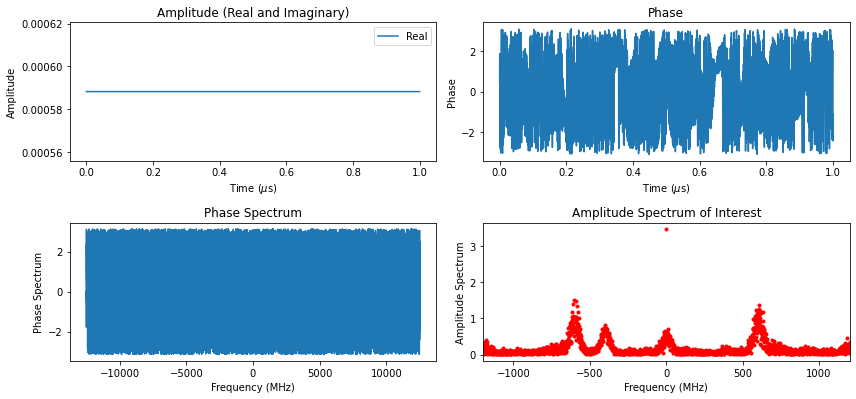

In [55]:
amplitude_spectrum_prime, phase_spectrum_prime = fourier_transformt(A_fit_tn, phi_fit_tn)
plot_frequency_domain(w_prime, t_prime, A_fit_tn, phi_fit_tn, amplitude_spectrum_prime,phase_spectrum_prime)

In [56]:
# Eliminate Outlying Data

for i in range(len(amplitude_spectrum_prime)):
    if amplitude_spectrum_prime[i] > 3:
        amplitude_spectrum_prime[i] = 0 

In [57]:
_, phi_fit_tn = fourier_transform(amplitude_spectrum_prime, phase_spectrum_prime)

In [58]:
calculate_mse(target_prime, amplitude_spectrum_prime)

0.006879997776842231

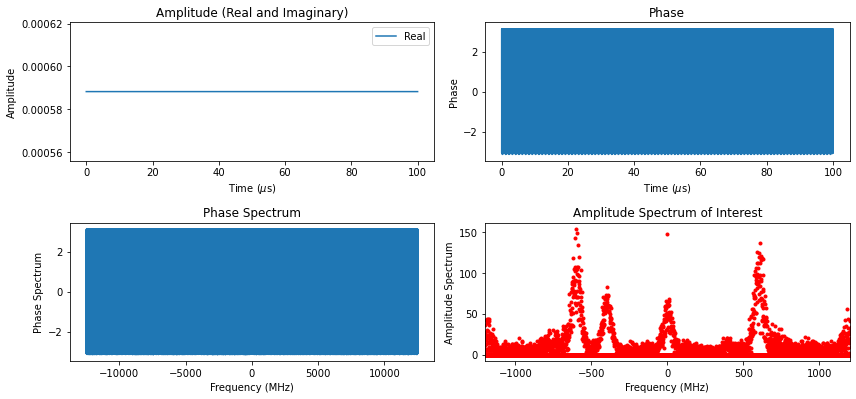

In [59]:
#  Check the performance when concatenates 1000 solutions

phi_tn = np.tile(phi_fit_tn, k)  # 将数组复制 n 次
#phi_tn = np.concatenate([phi_tn])  # 首尾相连
t = np.linspace(0, T0*k, 10 * N0*k)

#interest_begin=0
#interest_end=99900*2
#N=int((interest_end-interest_begin))
N = N0 * k * 10

w = np.fft.fftfreq(N, t[1]-t[0])
A_tn = np.tile(A_fit_tn, k)  # 将数组复制 n 次
#A_tn = np.concatenate([A_tn])  # 首尾相连

amplitude_spectrumn,phase_spectrumn=fourier_transformt(A_tn, phi_tn)
plot_frequency_domain(w, t, A_tn, phi_tn, amplitude_spectrumn, phase_spectrumn)

In [60]:
w = np.fft.fftfreq(len(amplitude_spectrumn), t[1]-t[0])
target, _= spectrum_generation(w)

In [61]:
amplitude_spectrumn = [amp / k for amp in amplitude_spectrumn]
error3 = calculate_mse(target, amplitude_spectrumn)

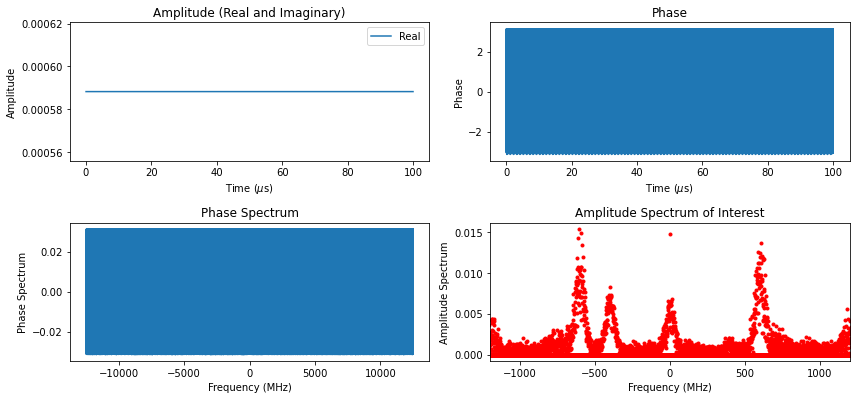

In [62]:
amplitude_spectrumn = [amp / k for amp in amplitude_spectrumn]
phase_spectrumn = [pmp / k for pmp in phase_spectrumn]

plot_frequency_domain(w, t, A_tn, phi_tn, amplitude_spectrumn, phase_spectrumn)

### Consider Discontinuities

Based on the computed error in previous simulation, we see that the error is nearly a multiple of a signle waveform. Now consider interpolation with discontinuities.

In [63]:
# Identify discontinuities

phi_int = phi_fit(t_prime)
A_int = A_fit(t_prime)

disconts = []

for i in range(len(t_prime) - 1):
    if np.abs(phi_int[i + 1] - phi_int[i]) > 0.1:
        disconts.append(i)

In [64]:
intervals = []
sub = []

for i in range(len(disconts) - 1):
    if disconts[i + 1] - disconts[i] > 1:
        sub.append(disconts[i])
        intervals.append(sub)
        sub = []
    else:
        sub.append(disconts[i])
    
intervals.append(sub)

In [65]:
# Now we modify the values of interpolations in discontinuities

for sub in intervals:
    for i in range(len(sub)):
        if i > int(len(sub) / 2):
            phi_int[sub[i]] = phi_int[sub[0] - 1]
        else:
            phi_int[sub[i]] = phi_int[sub[-1] + 1]
            
# Now we have interpolated phase with consideration of discontinuities

In [66]:
# Consider discontinuities in A_t

disconts0 = []

for i in range(len(t_prime) - 1):
    if np.abs(A_int[i + 1] - A_int[i]) > 0.1:
        disconts0.append(i)

intervals0 = []
sub0 = []

for i in range(len(disconts0) - 1):
    if disconts0[i + 1] - disconts0[i] > 1:
        sub.append(disconts0[i])
        intervals.append(sub0)
        sub0 = []
    else:
        sub0.append(disconts0[i])
    
intervals0.append(sub0)

In [67]:
for sub in intervals0:
    for i in range(len(sub0)):
        if i > int(len(sub0) / 2):
            A_int[sub0[i]] = A_int[sub0[0] - 1]
        else:
            A_int[sub0[i]] = A_int[sub0[-1] + 1]
            
# Now we have interpolated amplitude with consideration of discontinuities

Now test for single duration with the interpolated waveform.

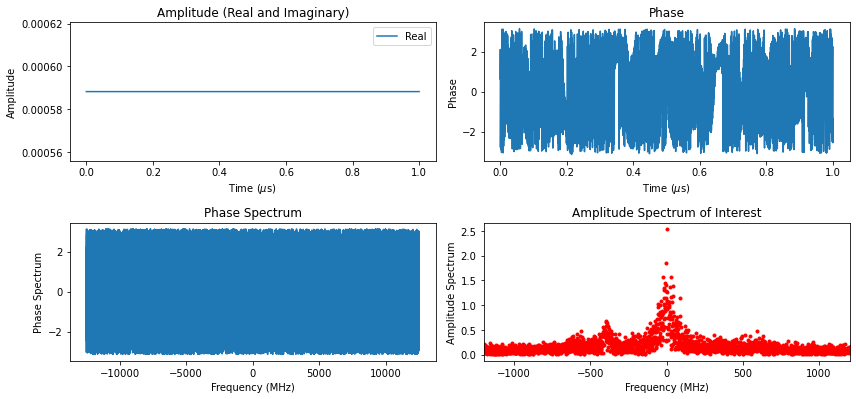

In [68]:
amplitude_int, phase_int = fourier_transformt(A_int, phi_int)
plot_frequency_domain(w_prime, t_prime, A_fit_tn, phi_fit_tn, amplitude_int, phase_int)

In [69]:
calculate_mse(target_prime, amplitude_int)

0.008076964329786924

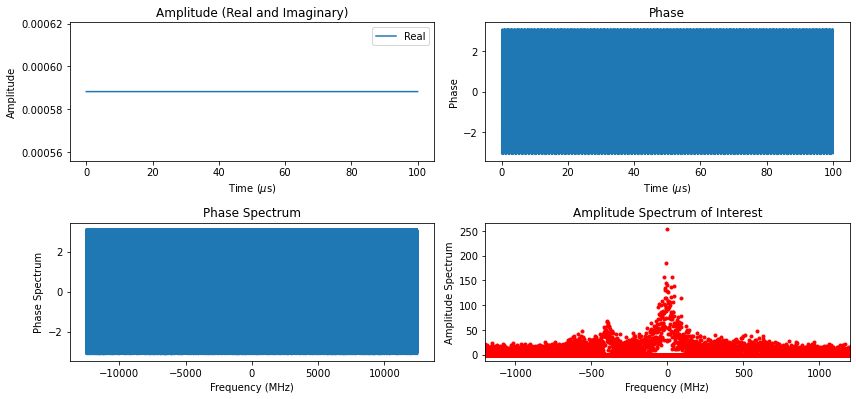

In [70]:
# Test for longer duration
#  Check the performance when concatenates 1000 solutions

phi_tn = np.tile(phi_int, k)  # 将数组复制 n 次
#phi_tn = np.concatenate([phi_tn])  # 首尾相连
t = np.linspace(0, T0*k, 10 * N0*k)

#interest_begin=0
#interest_end=99900*2
#N=int((interest_end-interest_begin))
N = N0 * k * 10

w = np.fft.fftfreq(N, t[1]-t[0])
A_tn = np.tile(A_int, k)  # 将数组复制 n 次
#A_tn = np.concatenate([A_tn])  # 首尾相连

amplitude_spectrumn,phase_spectrumn=fourier_transformt(A_tn, phi_tn)
plot_frequency_domain(w, t, A_tn, phi_tn, amplitude_spectrumn, phase_spectrumn)

In [71]:
w = np.fft.fftfreq(len(amplitude_spectrumn), t[1]-t[0])
target, _= spectrum_generation(w)

amplitude_spectrumn = [amp / k for amp in amplitude_spectrumn]
error4 = calculate_mse(target, amplitude_spectrumn)

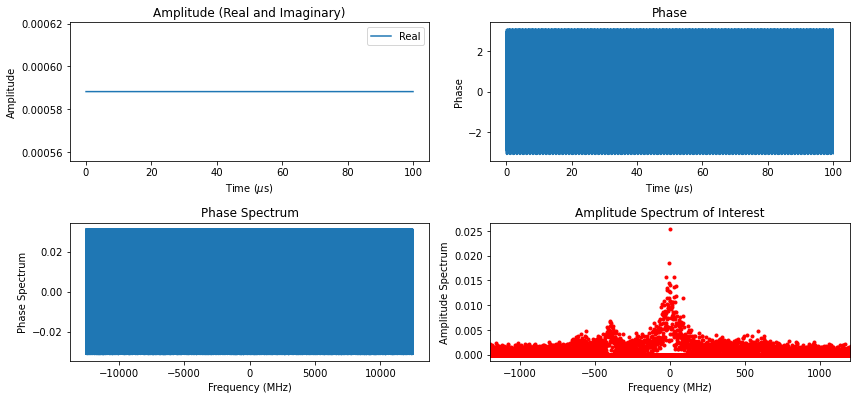

In [72]:
amplitude_spectrumn = [amp / k for amp in amplitude_spectrumn]
phase_spectrumn = [pmp / k for pmp in phase_spectrumn]

plot_frequency_domain(w, t, A_tn, phi_tn, amplitude_spectrumn, phase_spectrumn)

## Comparison

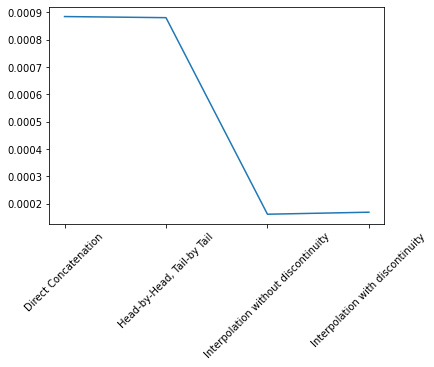

In [73]:
x = ["Direct Concatenation", "Head-by-Head, Tail-by Tail", "Interpolation without discontinuity", "Interpolation with discontinuity"]
errors = [error1, error2, error3, error4]

plt.plot(x, errors)
plt.xticks(rotation=45)
plt.show()

In [75]:
# Note: we divide the amplitude by k to reveals actual error between the reconstruction and target
# Enhancement above seems mild, but we shall notice that the total error is a tuple of k
# As k goes up to the scale of 10**6 (~1s) it has great impact on overall accuracy
# Now we should encapsulate all steps into a single function for clearity

'''
Design input:
    T0: duration of short solution
    phi_t: reconstruct phase in a single unit of time (T0)
    A_t: reconstruct amplitude in a single unit of time (T0)
    k: total number of solutions to be concatenated
    d: number of points in interpolation
Design output:
    error: error between interpolated solution and target spectrum (should be modified)
    amplitude: interpolated A_t
    phase: interpolated phi_t
    amp_sp: amplitude spectrum of interpolated solution
    phi_sp: phase spectrum of interpolated solution
    w: frequency range of 
    t: time span for interpolation
'''

def concatenate_w_int(T0, phi_t, A_t, k, d):
    
    # Number of Sampling Points
    N0 = len(phi_t)
    
    # Original Time Span
    t0 = np.linspace(0, T0, N0)
    
    # Interpolation Fitting
    amp_fit = interp1d(t0, A_t)
    phi_fit = interp1d(t0, phi_t)
    
    # Interpolation
    tn = np.linspace(0, T0, N0 * d)
    amp_int = amp_fit(tn)
    phi_int = phi_fit(tn)
    
    # Extended Time Span
    t = np.linspace(0, k * T0, k * N0 * d)
    
    # Direct Concatenate
    amp = np.tile(amp_int, k)
    phi = np.tile(phi_int, k)
    
    amp_sp, phi_sp = fourier_transformt(amp, phi)
    
    w = np.fft.fftfreq(N0 * k * d, tn[1] - tn[0])
    target, _ = spectrum_generation(w)
    
    amp_sp_prime = [amp / k for amp in amp_sp]
    error = calculate_mse(target, amp_sp_prime)
    return error, amp, phi, amp_sp, phi_sp, w, t

In [112]:
error, amp, phi, amp_sp, phi_sp, w, t = concatenate_w_int(T0, phi_t0, A_t0, k = 1000, d = 10)

In [113]:
print(error)

9.659544440861137e-05
